### Janet Illescas Coria

# Práctica 5

## Restauración de la imagen.

In [1]:
# Bibliotecas para la manipulación de imágenes, matrices, crear
# números aleatorios y el manejo de archivos y directorios.
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import os

In [2]:
# Configuración de pyplot para ver las imágenes en escala de grises.
plt.rcParams['image.cmap'] = 'gray'
# Comando de Jupyter para que las imágenes se muestren automaticamente.
%matplotlib inline

In [3]:
# Obtiene la imagen de la dirección recibida.
def obtener_img(img):
    try: 
        # Verificamos si el archivo existe en la dirección recibida, si 
        # no existe lanzamos una excepción.
        if not os.path.exists(img):
            raise TypeError('No existe el archivo')
            
        # Terminaciones permitidas
        terminaciones = ['.png', '.jpg', '.tif', '.tiff', '.bmp']
        
        # Verificamos si el archivo es png, jpg, tif, tiff o bmp
        for term in terminaciones:
            if img.endswith(term):
                
                # Leemos la imagen.
                img = io.imread(img)
                
                # Convertimos la imagen a escala de grises (un solo canal)
                img_gray = np.mean(img, axis=-1)

                # Regresamos la imagen como un arreglo numpy (matriz).
                return img
            
        # Al no ser un archivo permitido lanzamos una excepción.
        raise TypeError('El archivo debe ser png, jpg, tif o tiff')
    
    except TypeError as e:
        print(f"TypeError: {e}")

In [4]:
# Función que suma pixel a pixel dos imágenes recibidas, las cuales 
# deben ser del mismo tamaño.
def suma_imagenes(img1, img2):
    try:
        if not isinstance(img1, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img1.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if not isinstance(img2, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img2.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if img1.shape != img2.shape:
            raise TypeError('Las imágenes deben ser del mismo tamaño') 
            
        nueva_img = np.zeros(img1.shape)
        for y in range(0, img1.shape[0]):
            for x in range(0, img1.shape[1]):
                sum = img1[y][x] + img2[y][x]
                if sum < 0:
                    sum = 0
                elif sum > 255:
                    sum = 255
                nueva_img[y][x] = sum
                
        return nueva_img
        
    except TypeError as e:
        print(f"TypeError: {e}")

In [5]:
# Función que resta pixel a pixel las dos imágenes recibidas.
def resta_imagenes(img1, img2):
    try:
        if not isinstance(img1, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img1.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if not isinstance(img2, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img2.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if img1.shape != img2.shape:
            raise TypeError('Las imágenes deben ser del mismo tamaño') 
            
        nueva_img = np.zeros(img1.shape)
        min = 0
        max = 255
        for y in range(0, img1.shape[0]):
            for x in range(0, img1.shape[1]):
                resta = img1[y][x] - img2[y][x]
                nueva_img[y][x] = resta
                
        nueva_img = np.clip(nueva_img, 0, 255)
        return nueva_img
    
    except TypeError as e:
            print(f"TypeError: {e}")

In [6]:
# Función que generar ruido sal y pimienta en la imagen recibida, 
# utlizando un porcentaje para definir la probabilidad de ruido
def ruido_sal_pim(img, porcentaje = 0.05):
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if not isinstance(porcentaje, int) and not isinstance(porcentaje, float):
            raise TypeError('El porcentaje debe ser de tipo numérico')
        if porcentaje < 0:
            raise TypeError('El porcentaje debe ser un número positivo')
            
        img_s_p = np.copy(img)
        num_pixeles = img.shape[0] * img.shape[1] * porcentaje
        
        for i in range(int(num_pixeles // 2)):
            y = np.random.randint(0, img.shape[0])
            x = np.random.randint(0, img.shape[1])
            img_s_p[y][x] = 0
            
        for i in range(int(num_pixeles // 2)):
            y = np.random.randint(0, img.shape[0])
            x = np.random.randint(0, img.shape[1])
            img_s_p[y][x] = 255
        
        return img_s_p
    
    except TypeError as e:
            print(f"TypeError: {e}")

In [7]:
# Función que generar ruido gaussiano en la imagen recibida, se hace uso
# de la desviación estandar y la media.
def ruido_gaussiano(img, desviacion_e = 40, media = 0):
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if not isinstance(desviacion_e, int) and not isinstance(desviacion_e, float):
            raise TypeError('La desviación estándar debe ser de tipo numérico')
        if not isinstance(media, int) and not isinstance(media, float):
            raise TypeError('La media debe ser de tipo numérico')
        
        ruido = np.random.normal(media, desviacion_e, img.shape)
    
        # Sumamos el ruido gaussiano a la imagen original
        img_gaus = suma_imagenes(img, ruido)
        return img_gaus
    
    except TypeError as e:
            print(f"TypeError: {e}")

1. Utiliza la imagen del circuito, generale ruido gaussiano aditivo con media cero y desviacion estandar de 0.04. Filtra la imagen primero con un filtro promedio aritmético de tamaño 3 × 3, y luego filtrala con un filtro promedio geometrico del mismo tamano. Comparalos (genera así la figura 5.7 del libro de Gonzalez et. al.)

In [8]:
# Función para aplicar la convolución en la coordenada (y,x) de la 
# imagen recibida con la máscara recibida.
def convolucion(img, cordyx, mascara):
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if not isinstance(cordyx, tuple):
            raise TypeError('Las coordenadas deben ser una tupla')
        if len(cordyx) != 2:
            raise TypeError('Las coordenadas deben de ser 2')
        if not isinstance(mascara, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(mascara.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
            
        r = mascara.shape[0] // 2
        y = cordyx[0] - r
        x = cordyx[1] - r
        
        result = []
        
        max_y = img.shape[0]
        max_x = img.shape[1]
        
        for i in range(0, mascara.shape[0]):
            if y+i >= 0 and y+i < max_y:
                for j in range(0, mascara.shape[0]):
                    if x+j >= 0 and x+j < max_x:
                        result.append(img[y+i][x+j] * mascara[i][j])
                        
        return result
            
    except TypeError as e:
            print(f"TypeError: {e}")

In [9]:
# Función para aplicar el filtro promedio aritmético a la imagen 
# recibida con el orden n indicado.
def promedio_aritmetico(img, orden):
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional')
        if not isinstance(orden, int) or orden <= 0 or orden % 2 == 0:
            raise TypeError('El orden de la máscara debe ser un entero impar positivo.')
        if orden > img.shape[0] or orden > img.shape[1]:
            raise TypeError('El orden de la máscara no puede ser mayor al tamaño de la imagen.')  
        
        img_fpa = np.zeros(img.shape)
        mascara = np.ones((orden, orden))
        
        for y in range(0, img.shape[0]):
            for x in range(0, img.shape[1]):
                conv = convolucion(img, (y, x), mascara)
                img_fpa[y][x] = round(sum(conv) / len(conv))
        
        return img_fpa

    except TypeError as e:
        print(f"TypeError: {e}")

In [10]:
# Función para aplicar el filtro promedio geométrico a la imagen 
# recibida con el orden n indicado.
def promedio_geometrico(img, orden):
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional')
        if not isinstance(orden, int) or orden <= 0 or orden % 2 == 0:
            raise TypeError('El orden de la máscara debe ser un entero impar positivo.')
        if orden > img.shape[0] or orden > img.shape[1]:
            raise TypeError('El orden de la máscara no puede ser mayor al tamaño de la imagen.')  
        
        img_fpg = np.zeros(img.shape)
        mascara = np.ones((orden, orden))
        
        for y in range(0, img.shape[0]):
            for x in range(0, img.shape[1]):
                conv = convolucion(img, (y, x), mascara)
                conv = [1 if tono == 0 else tono for tono in conv]
                img_fpg[y][x] = round(np.prod(conv) ** (1/len(conv)))
        
        return img_fpg

    except TypeError as e:
        print(f"TypeError: {e}")

Text(0.5, 1.0, 'Filtro promedio geométrico de 3x3')

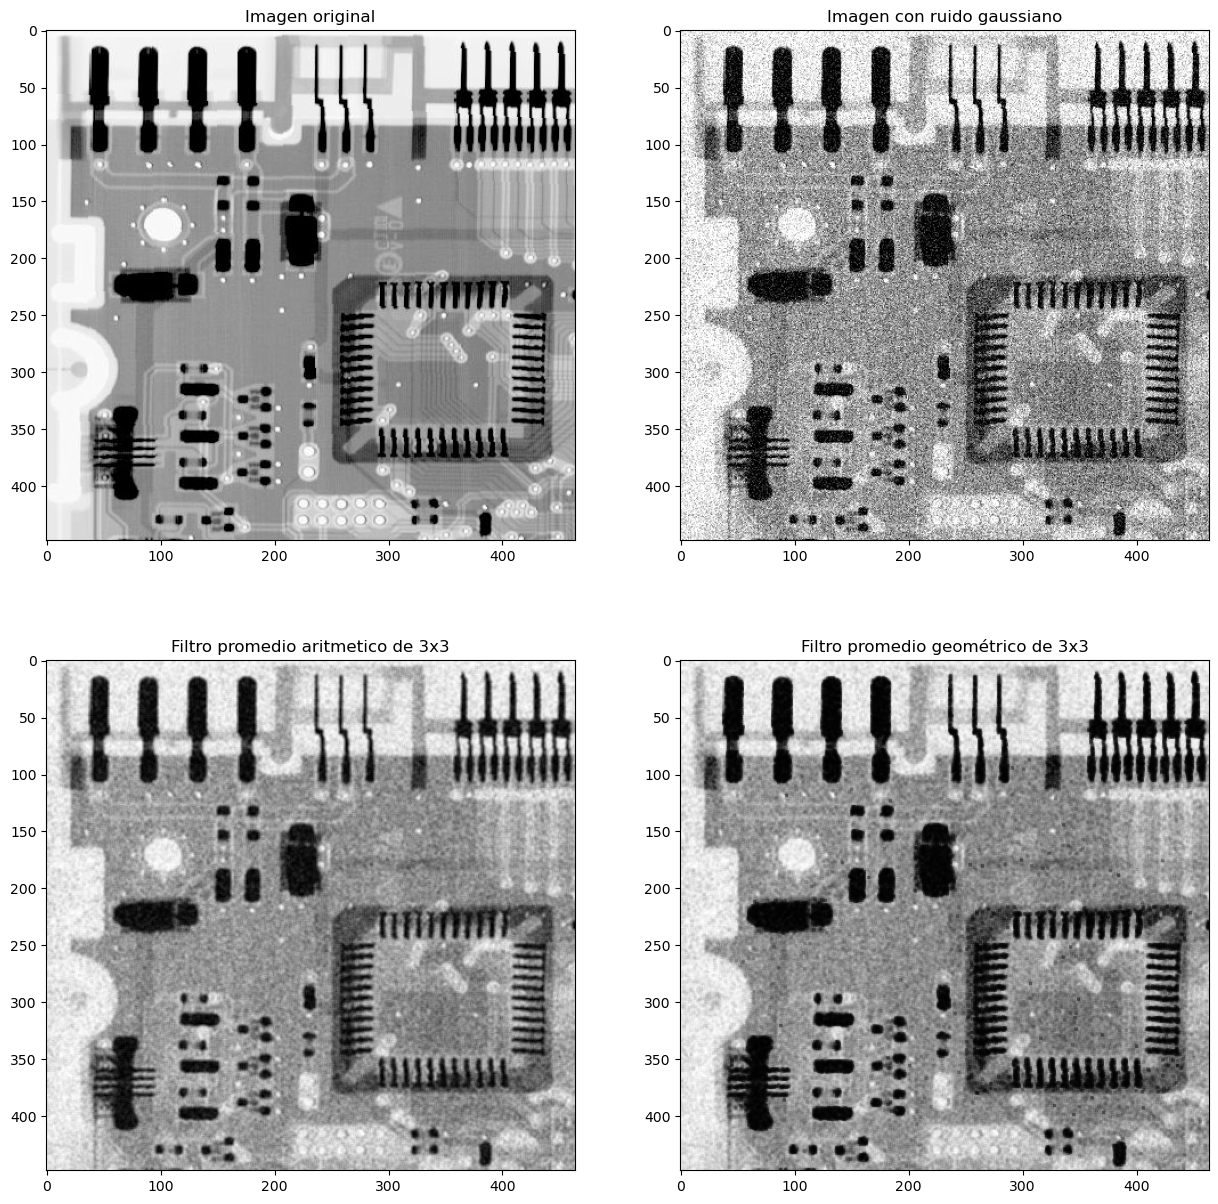

In [11]:
img = obtener_img('img/circuit.tif')
img_gaus = ruido_gaussiano(img, desviacion_e = 40)
img_fpa = promedio_aritmetico(img_gaus, 3)
img_fpg = promedio_geometrico(img_gaus, 3)

plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.imshow(img, vmin=0, vmax=255)
plt.title('Imagen original')

plt.subplot(2,2,2)
plt.imshow(img_gaus, vmin=0, vmax=255)
plt.title('Imagen con ruido gaussiano')

plt.subplot(2,2,3)
plt.imshow(img_fpa, vmin=0, vmax=255)
plt.title('Filtro promedio aritmetico de 3x3')

plt.subplot(2,2,4)
plt.imshow(img_fpg, vmin=0, vmax=255)
plt.title('Filtro promedio geométrico de 3x3')

2. Utiliza nuevamente la imagen circuito, generale ruido gaussiano aditivo de media cero y desviación estándar de 0.04. Filtrala primero con un filtro promedio aritmético de tama ̃no 7 × 7. Filtrala ahora con un filtro geométrico del mismo tamaño. Finalmente filtrala con un filtro adaptativo para reducción de ruido del mismo tamaño que los anteriores. Comparalos (genera así la figura 5.13 del libro de Gonzalez et.al.).

In [12]:
# Función para aplicar el filtro adaptativo a la imagen 
# recibida con el orden n indicado y la varianza general recibida.
def adaptativo(img, orden, var_n):
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional')
        if not isinstance(orden, int) or orden <= 0 or orden % 2 == 0:
            raise TypeError('El orden de la máscara debe ser un entero impar positivo.')
        if orden > img.shape[0] or orden > img.shape[1]:
            raise TypeError('El orden de la máscara no puede ser mayor al tamaño de la imagen.')  
        if not isinstance(var_n, int) and not isinstance(var_n, float):
            raise TypeError('La varianza debe ser de tipo numérico')
        
        img_fa = np.zeros(img.shape)
        mascara = np.ones((orden, orden))
        
        for y in range(0, img.shape[0]):
            for x in range(0, img.shape[1]):
                gx = img[y][x]
                conv = convolucion(img, (y, x), mascara)
                m_l = sum(conv) / len(conv)
                var_l = sum([(i - m_l)**2 for i in conv]) / len(conv)
                img_fa[y][x] = gx - (var_n/var_l) * (gx-m_l)
        
        return img_fa

    except TypeError as e:
        print(f"TypeError: {e}")

In [13]:
# Función para obtener la varianza general de la imagen recibida.
def varianza_g(img):
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional')

        arr = []
        
        for y in range(0, img.shape[0]):
            for x in range(0, img.shape[1]):
                arr.append(img[y][x])
                
        tamaño = img.shape[0]*img.shape[1]
        media = sum(arr) / tamaño
        var_g = sum([(i-media)**2 for i in arr]) / tamaño
        
        return var_g

    except TypeError as e:
        print(f"TypeError: {e}")

Text(0.5, 1.0, 'Filtro adaptativo de 7x7')

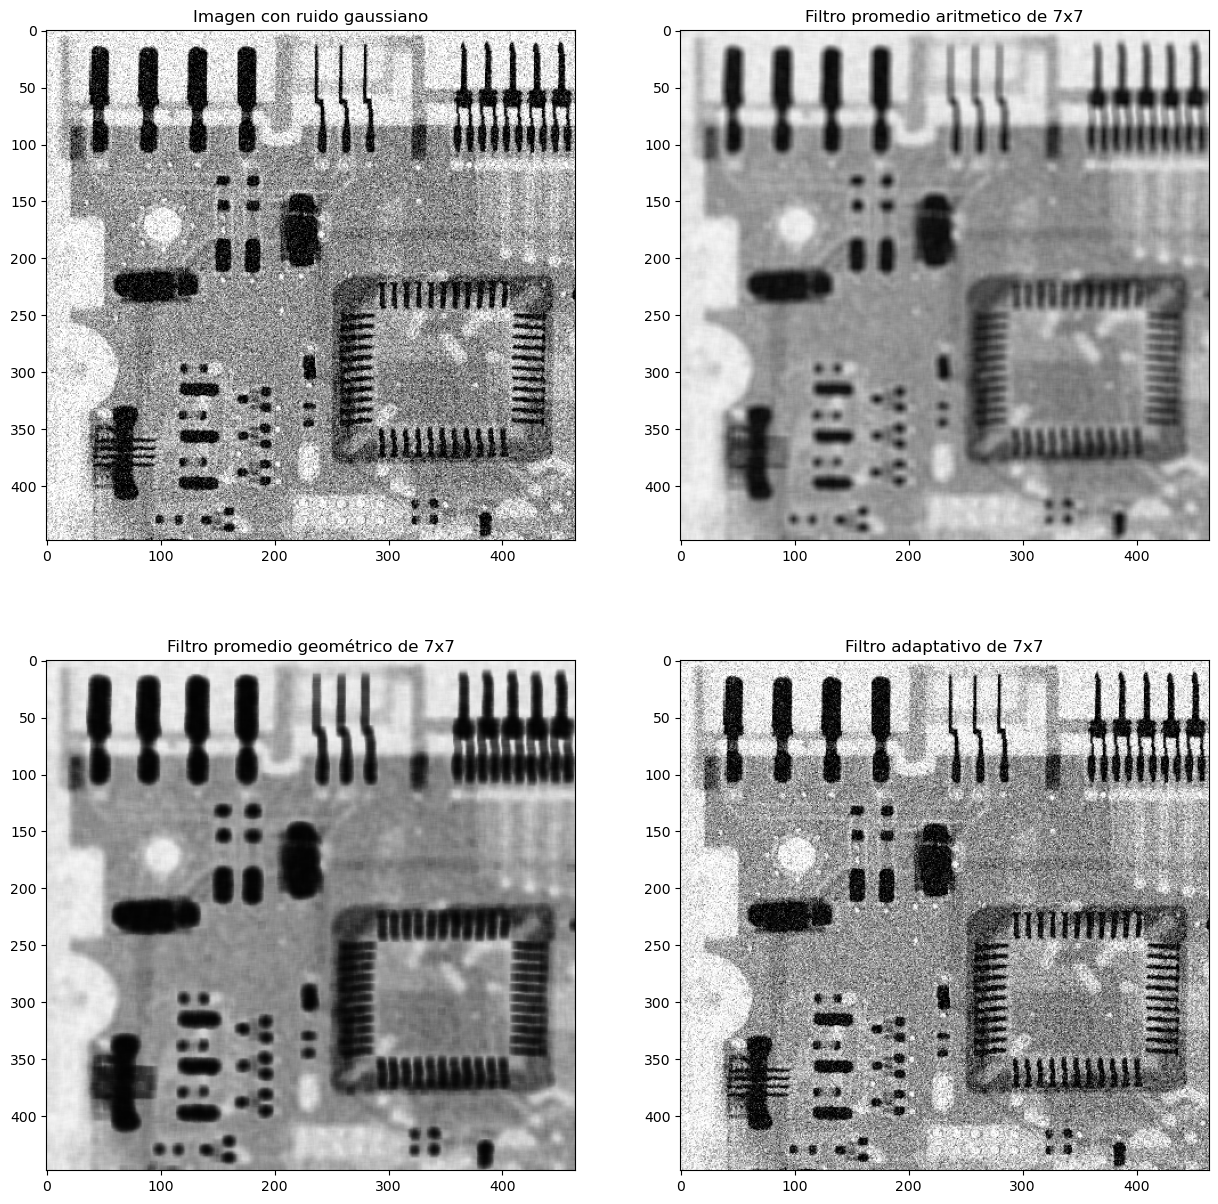

In [14]:
img = obtener_img('img/circuit.tif')
img_gaus = ruido_gaussiano(img, desviacion_e = 40)
img_fpa = promedio_aritmetico(img_gaus, 7)
img_fpg = promedio_geometrico(img_gaus, 7)
var_n = varianza_g(img_gaus) ** (0.5)
img_fa = adaptativo(img_gaus, 7, var_n)

plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.imshow(img_gaus, vmin=0, vmax=255)
plt.title('Imagen con ruido gaussiano')

plt.subplot(2,2,2)
plt.imshow(img_fpa, vmin=0, vmax=255)
plt.title('Filtro promedio aritmetico de 7x7')

plt.subplot(2,2,3)
plt.imshow(img_fpg, vmin=0, vmax=255)
plt.title('Filtro promedio geométrico de 7x7')

plt.subplot(2,2,4)
plt.imshow(img_fa, vmin=0, vmax=255)
plt.title('Filtro adaptativo de 7x7')

3. Utiliza la imagen circuito, generale un ruido sal y pimienta aditivo con probabilidades Pa = Pb = 0.25. Filtrala primero con un filtro mediana de tamaño 7 × 7. Filtrala ahora con un filtro mediana adaptativo con Smax = 7. Comparalos (genera así la figura 5.14 del libro de Gonzalez et. al.).

In [15]:
# Función para aplicar el filtro mediana a la imagen recibida, a partir 
# del orden (tamaño) que se indique para la máscara de unos que le será 
# aplicada.
def filtro_mediana(img, orden):
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if not isinstance(orden, int) or orden <= 0 or orden % 2 == 0:
            raise TypeError('El orden de la máscara debe ser un entero impar positivo.')
        if orden > img.shape[0] or orden > img.shape[1]:
            raise TypeError('El orden de la máscara no puede ser mayor al tamaño de la imagen.')
            
        img_f_m = np.zeros(img.shape)
        mascara = np.ones((orden, orden)) 
            
        for y in range(0, img.shape[0]):
            for x in range(0, img.shape[1]):
                conv = convolucion(img, (y, x), mascara)
                conv.sort()
                i_med = len(conv) // 2
                img_f_m[y][x] = conv[i_med]
            
        return img_f_m
    
    except TypeError as e:
            print(f"TypeError: {e}")

In [16]:
# Función para aplicar el filtro mediana adaptativo a la imagen 
# recibida con el orden n indicado y un orden máximo.
def mediana_adaptativo(img, orden, orden_max):
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional')
        if not isinstance(orden, int) or orden <= 0 or orden % 2 == 0:
            raise TypeError('El orden de la máscara debe ser un entero impar positivo.')
        if orden > img.shape[0] or orden > img.shape[1]:
            raise TypeError('El orden de la máscara no puede ser mayor al tamaño de la imagen.')  
        if not isinstance(orden_max, int) or orden_max <= 0 or orden_max % 2 == 0:
            raise TypeError('El orden máximo de la máscara debe ser un entero impar positivo.')
        if orden_max > img.shape[0] or orden_max > img.shape[1]:
            raise TypeError('El orden máximo de la máscara no puede ser mayor al tamaño de la imagen.')  
        
        img_fma = np.zeros(img.shape)
        mascara = np.ones((orden, orden))
        
        for y in range(0, img.shape[0]):
            for x in range(0, img.shape[1]):
                
                conv = convolucion(img, (y, x), mascara)
                conv.sort()
                med = conv[len(conv) // 2]
                pixel = img[y][x]
                min_p = min(conv)
                max_p = max(conv)
                
                if med > min_p and med < max_p:
                    if pixel > min_p and pixel < max_p:
                        img_fma[y][x] = pixel
                    else:
                        img_fma[y][x] = med
                else:
                    orden_n = orden + 2
                    if orden_n > orden_max:
                        img_fma[y][x] = med
                    else: 
                        return mediana_adaptativo(img, orden_n, orden_max)
        
        return img_fma

    except TypeError as e:
        print(f"TypeError: {e}")

Text(0.5, 1.0, 'Filtro mediana adaptativo de max 7x7')

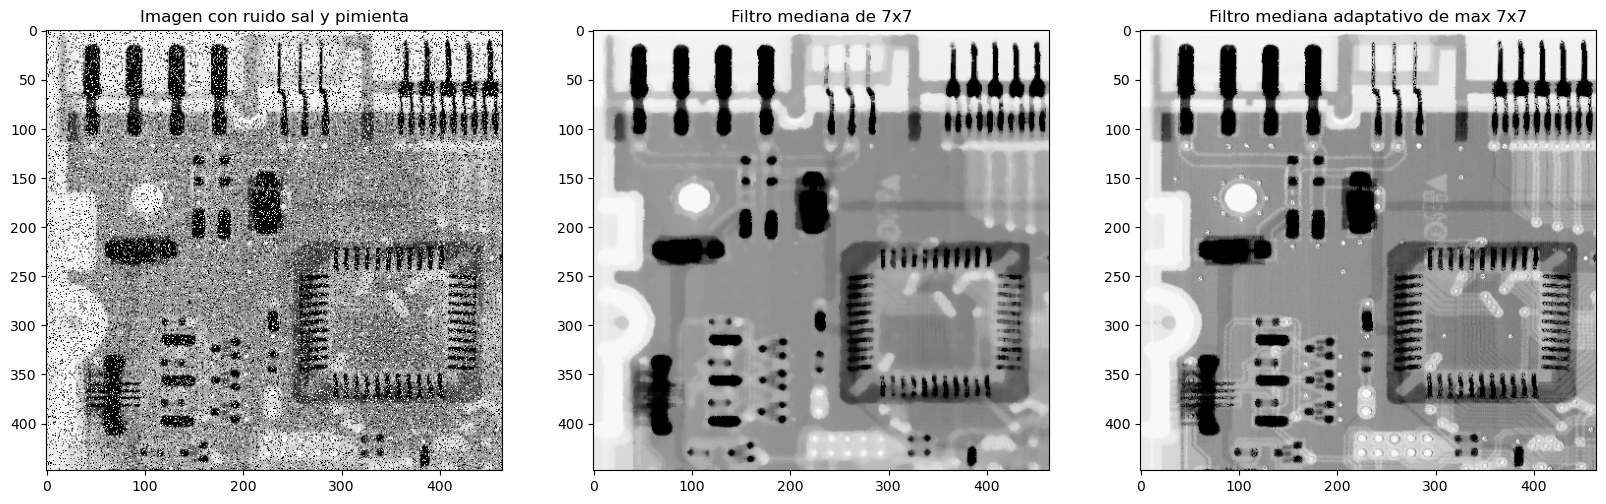

In [17]:
img = obtener_img('img/circuit.tif')
img_sp = ruido_sal_pim(img, 0.25)
img_fm = filtro_mediana(img_sp, 7)
img_fma = mediana_adaptativo(img_sp, 3, 7)

plt.figure(figsize=(20, 20))

plt.subplot(1,3,1)
plt.imshow(img_sp, vmin=0, vmax=255)
plt.title('Imagen con ruido sal y pimienta')

plt.subplot(1,3,2)
plt.imshow(img_fm, vmin=0, vmax=255)
plt.title('Filtro mediana de 7x7')

plt.subplot(1,3,3)
plt.imshow(img_fma, vmin=0, vmax=255)
plt.title('Filtro mediana adaptativo de max 7x7')


4. Para la imagen lena con ruido aditivo de tipo gausiano, encontrar el filtro de Wiener y restaurar la imagen. Para obtener una imagen con ruido gausiano se puede utilizar una imagen nítida y libre de ruido.

In [18]:
# Función para aplicar el filtro wiener a una imagen con pérdida de 
# nitidez y/o con ruido que es recibida como segundo parámetro, con 
# ayuda de la imagen original recibida como primer parámetro e indicando
# en el último parámetro el tipo de caso:
# - 1: imagen con ruido aditivo
# - 2: imagen con ruido aditivo
# - 3: imagen con ruido aditivo y pérdida de nitidez
# - 4: imagen con pérdida de nitidez y ruido aditivo
def wiener(img, img_g, tipo = 1):
    try:
        if not isinstance(img, np.ndarray) or not isinstance(img_g, np.ndarray):
            raise TypeError('Las imágenes deben ser instancia de numpy.ndarray')
        if len(img.shape) != 2 or len(img_g.shape) != 2:
            raise TypeError('Las imágenes deben ser un arreglo bidimensional') 
        if img.shape != img_g.shape:
            raise TypeError('Las imágenes deben ser del mismo tamaño') 

        resta = resta_imagenes(img_g, img)
        
        iF0 = np.fft.fft2(img)
        iFRi = np.fft.fft2(img_g)
        iFR = np.fft.fft2(resta) 
        
        iF0_r = np.abs(iF0)
        iFRi_r = np.abs(iFRi)
        iFR_r = np.abs(iFR)
        
        
        if tipo == 1:
            W = iF0_r / (iF0_r + iFR_r)
        elif tipo == 2:
            H = iFRi / iF0
            W = 1 / H
        elif tipo == 3:
            H = (iFRi) / iF0
            W = iF0_r / (H * (iF0_r + iFR_r))
        elif tipo == 4:
            H = iFRi / iF0
            H_c = np.conjugate(H)
            W = (iF0_r * H_c) / ((H * iF0_r * H_c) + iFR_r)
        else: 
            raise TypeError('Parámetro tipo no válido') 
        
        FxT = W * iFRi
        FxT = np.fft.ifft2(FxT)
        FxT = np.real(FxT)
        FxT = np.clip(FxT, 0, 255)
        
        return FxT
        
    except TypeError as e:
        print(f"TypeError: {e}")

Text(0.5, 1.0, 'Filtro wiener')

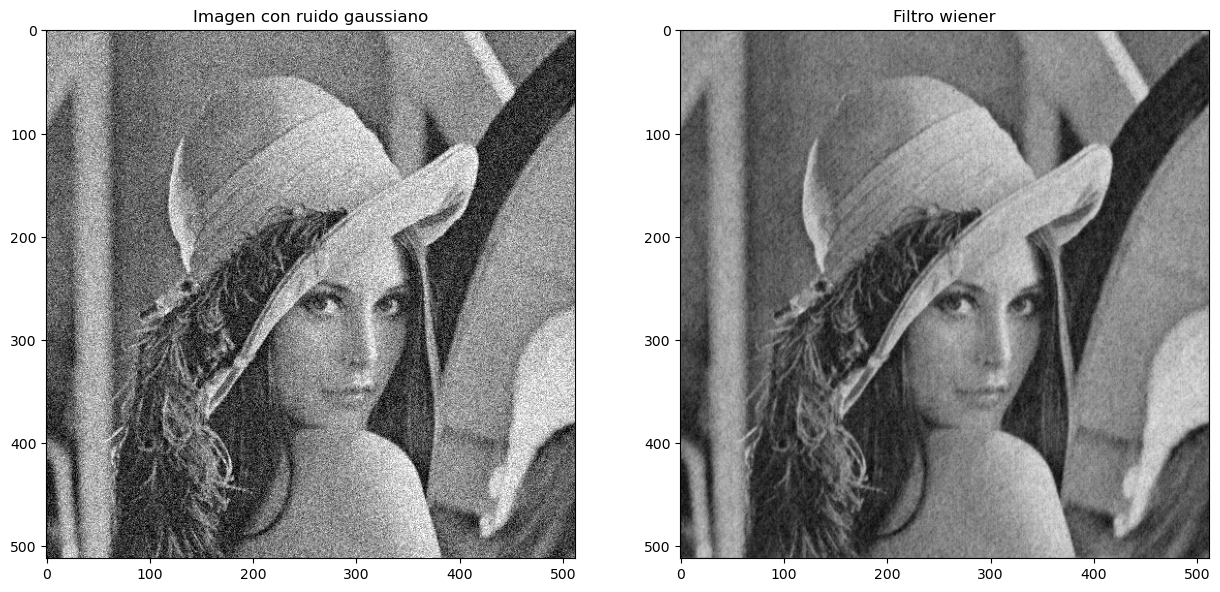

In [19]:
img = obtener_img('img/lenag.bmp')
img_g = ruido_gaussiano(img, 30)
img_w = wiener(img, img_g)

plt.figure(figsize=(15, 15))

plt.subplot(1,2,1)
plt.imshow(img_g, vmin=0, vmax=255)
plt.title('Imagen con ruido gaussiano')

plt.subplot(1,2,2)
plt.imshow(img_w, vmin=0, vmax=255)
plt.title('Filtro wiener')

5. Encontrar el filtro de Wiener y restaurar una imagen lena que ha sido sometida a un proceso de pérdida de nitidez. La imagen con pérdida de nitidez se obtiene filtrando una imagen nítida y libre de ruido con un filtro paso bajas de tamaño 9x9 normalizado (filtro promedio ponderado).

In [20]:
# Función para crear una máscara, del orden recibido, en base a las 
# distancias de cada pixel de la máscara con el pixel central, mientras 
# más cerca más grande su peso.
def mascara_dist(orden):
    try:
        if not isinstance(orden, int) or orden <= 0 or orden % 2 == 0:
            raise TypeError('El orden de la máscara debe ser un entero impar positivo.')
        
        mascara = np.zeros((orden, orden))
        centro = orden // 2
        max_d = orden - 1
    
        for y in range(0, orden):
            for x in range(0, orden):
                city_block =  abs(centro - y) + abs(centro - x)
                mascara[y][x] = 2 ** (max_d - city_block)
                
        return mascara
    
    except TypeError as e:
            print(f"TypeError: {e}")

In [21]:
# Función para aplicar el filtro ponderado a la imagen recibida, a partir 
# del orden (tamaño) que se indique para la máscara en base a las 
# distancias que le será aplicada.
def filtro_ponderado(img, orden):
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if not isinstance(orden, int) or orden <= 0 or orden % 2 == 0:
            raise TypeError('El orden de la máscara debe ser un entero impar positivo.')
        if orden > img.shape[0] or orden > img.shape[1]:
            raise TypeError('El orden de la máscara no puede ser mayor al tamaño de la imagen.')
            
        img_f_p = np.zeros(img.shape)
        mascara = mascara_dist(orden)
        
        factor_n = 0
        for y in range(0, orden):
            for x in range(0, orden):
                factor_n += mascara[y][x]
            
        for y in range(0, img.shape[0]):
            for x in range(0, img.shape[1]):
                conv = convolucion(img, (y, x), mascara)
                img_f_p[y][x] = round(sum(conv) / factor_n)
            
        return img_f_p
    
    except TypeError as e:
            print(f"TypeError: {e}")

Text(0.5, 1.0, 'Filtro wiener')

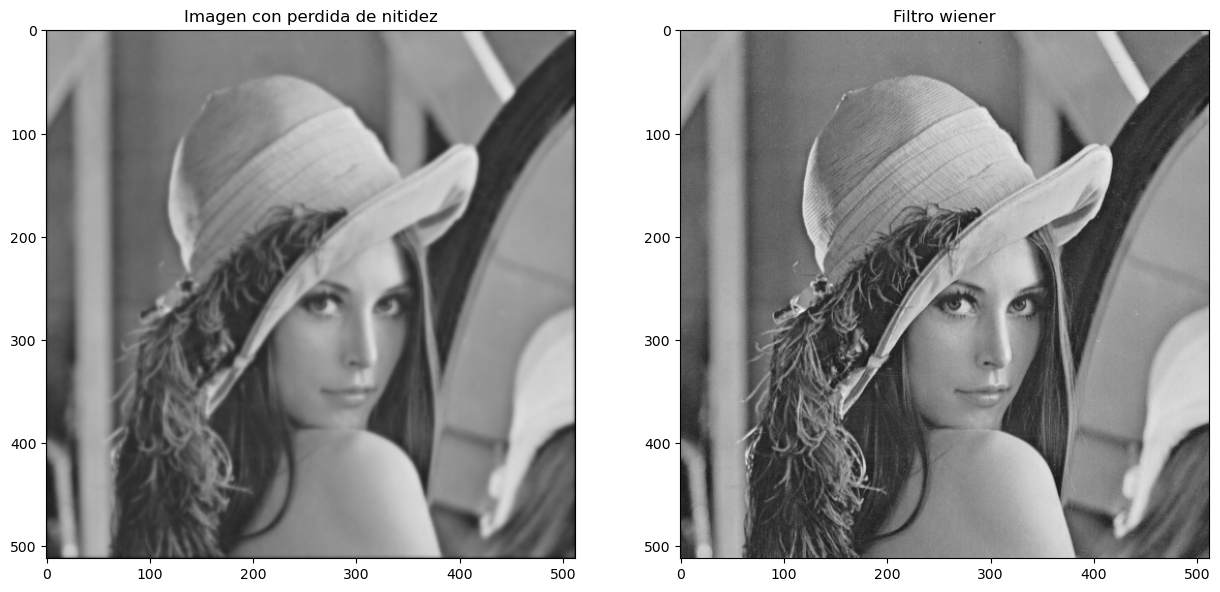

In [22]:
img = obtener_img('img/lenag.bmp')
img_p = filtro_ponderado(img, 9)
img_w = wiener(img, img_p, 2)

plt.figure(figsize=(15, 15))

plt.subplot(1,2,1)
plt.imshow(img_p, vmin=0, vmax=255)
plt.title('Imagen con perdida de nitidez')

plt.subplot(1,2,2)
plt.imshow(img_w, vmin=0, vmax=255)
plt.title('Filtro wiener')

6. Para una imagen lena a la que se le ha agregado ruido de tipo gausiano y posteriormente ha perdido nitidez, encontrar el filtro de Wiener y restaurarla. Para obtener esta imagen degradada, primero se agrega el ruido de tipo gausiano la imagen original y luego se filtra con el mismo filtro paso bajas descrito en el punto 5.

Text(0.5, 1.0, 'Filtro wiener')

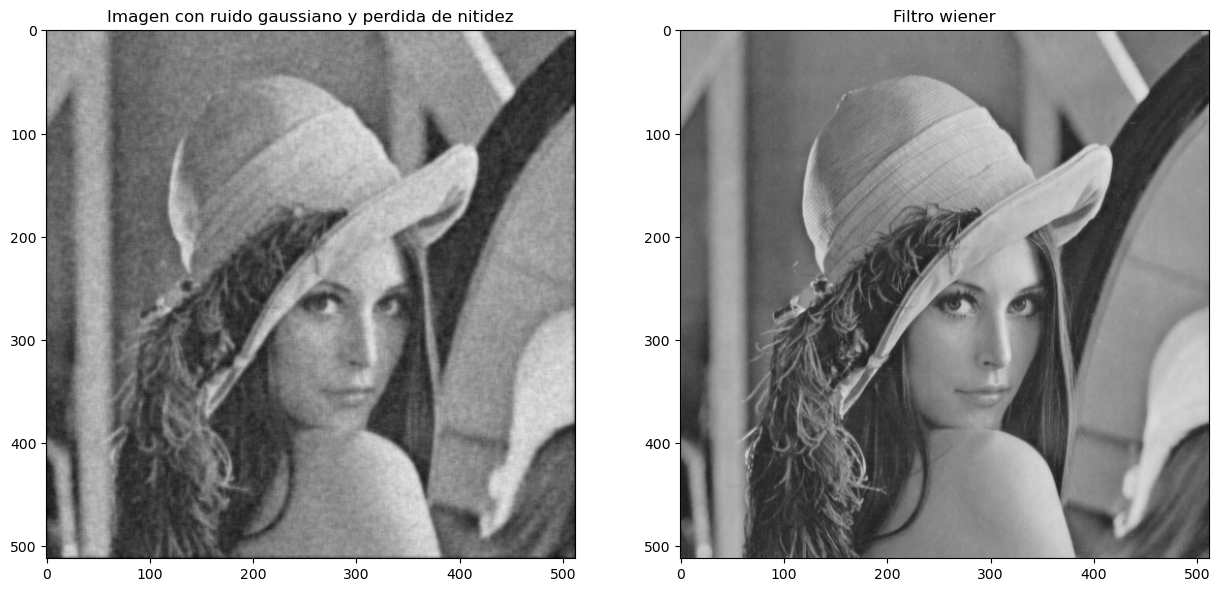

In [23]:
img = obtener_img('img/lenag.bmp')
img_g = ruido_gaussiano(img, 30)
img_p = filtro_ponderado(img_g, 9)
img_w = wiener(img, img_p, 3)

plt.figure(figsize=(15, 15))

plt.subplot(1,2,1)
plt.imshow(img_p, vmin=0, vmax=255)
plt.title('Imagen con ruido gaussiano y perdida de nitidez')

plt.subplot(1,2,2)
plt.imshow(img_w, vmin=0, vmax=255)
plt.title('Filtro wiener')

7. Encontrar el filtro de Wiener y restaurar una imagen lena que ha sido degrada por pérdida nitidez y posteriormente se le ha agregado ruido de tipo gausiano. Para obtener esta imagen degradada se utiliza el filtro paso bajas descrito en el punto 5 y posteriormente se le agrega ruido.

Text(0.5, 1.0, 'Filtro wiener')

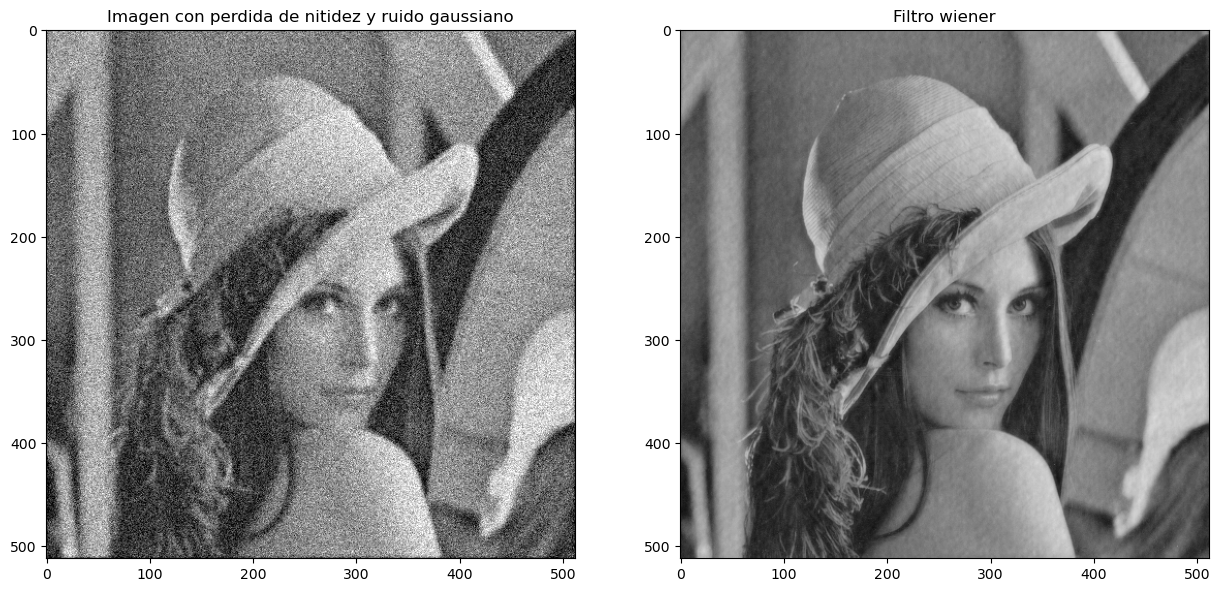

In [24]:
img = obtener_img('img/lenag.bmp')
img_p = filtro_ponderado(img, 9)
img_g = ruido_gaussiano(img_p, 30)
img_w = wiener(img, img_g, 4)

plt.figure(figsize=(15, 15))

plt.subplot(1,2,1)
plt.imshow(img_g, vmin=0, vmax=255)
plt.title('Imagen con perdida de nitidez y ruido gaussiano')

plt.subplot(1,2,2)
plt.imshow(img_w, vmin=0, vmax=255)
plt.title('Filtro wiener')